In [1]:
# import necessary packages
import requests
from bs4 import BeautifulSoup
import re

In [2]:
# related infomation
API_KEY = "59cbd6ff6b3ce5d506f0eeb69e4e09362409"
query = "Characterizing cellular and molecular variabilities of peripheral immune cells in healthy inactivated SARS-CoV-2 vaccine recipients by single-cell RNA sequencing"
database = "pubmed"
# use e-search for matching UIDs
search_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&api_key={API_KEY}&term={query}"

In [3]:
search_url

'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&api_key=59cbd6ff6b3ce5d506f0eeb69e4e09362409&term=Characterizing cellular and molecular variabilities of peripheral immune cells in healthy inactivated SARS-CoV-2 vaccine recipients by single-cell RNA sequencing'

In [4]:
BeautifulSoup(requests.get(search_url).text, 'html.parser').find_all('id')[0].text

/home/ouyangkang/software/anaconda3/envs/ML/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


'36987861'

In [5]:
search_id = 36987861
fetch_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id={search_id}&api_key={API_KEY}&rettype=medline&retmode=text"
detailed_info = BeautifulSoup(requests.get(fetch_url).text, 'html.parser')

In [6]:
detailed_info


PMID- 36987861
OWN - NLM
STAT- MEDLINE
DCOM- 20230510
LR  - 20230513
IS  - 2222-1751 (Electronic)
IS  - 2222-1751 (Linking)
VI  - 12
IP  - 1
DP  - 2023 Dec
TI  - Characterizing the cellular and molecular variabilities of peripheral immune 
      cells in healthy recipients of BBIBP-CorV inactivated SARS-CoV-2 vaccine by 
      single-cell RNA sequencing.
PG  - e2187245
LID - 10.1080/22221751.2023.2187245 [doi]
LID - e2187245
AB  - Over 3 billion doses of inactivated vaccines for severe acute respiratory 
      syndrome coronavirus 2 (SARS-CoV-2) have been administered globally. However, our 
      understanding of the immune cell functional transcription and T cell receptor 
      (TCR)/B cell receptor (BCR) repertoire dynamics following inactivated SARS-CoV-2 
      vaccination remains poorly understood. Here, we performed single-cell RNA and 
      TCR/BCR sequencing on peripheral blood mononuclear cells at four time points 
      after immunization with the inactivated SARS-CoV-2 v

In [18]:
doi_pattern = re.compile(r'LID - (.*) \[doi\]')
re.findall(doi_pattern, str(detailed_info))[0]

'10.1080/22221751.2023.2187245'

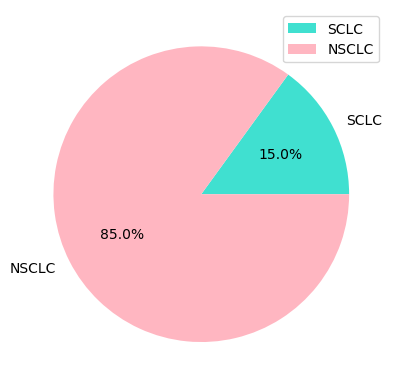

In [13]:
import matplotlib.pyplot as plt
plot_data = [['SCLC', 'NSCLC'], [0.15, 0.85]]
colors = ['turquoise', 'lightpink']
plt.pie(plot_data[1], labels=plot_data[0], colors=colors, autopct='%1.1f%%')
plt.legend()
plt.show()